In [65]:
import xarray as xr #xarray library for Met. dataset processing
import matplotlib.pyplot as plt
import cartopy.crs as ccrs  # Import cartopy coordinate reference systems
import cartopy.feature as cfeature  # To add features such as borders
import numpy as np
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER #cartopy gridline

# Load the new dataset
file_path = 'nc02.nc'  #file path
data = xr.open_dataset(file_path)


In [66]:
print(data)

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, expver: 2, time: 11)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 2023-01-01 2023-02-01 ... 2023-11-01
Data variables:
    t2m        (time, expver, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-12-29 09:54:46 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...


In [102]:
#Select the subset of data: first time point and first experiment version
t2m = data['t2m'].isel(time=0, expver=0)
# t2m = data['t2m'].isel(time=0, longitude=range(900,1000), latitude=range(150,250), expver=0)

#play with the data:
# print(t2m.shape)
numpy_arrays = t2m.values
print(numpy_arrays)
# np.savetxt("data.csv", t2m, delimiter=",")

[[250.67892 250.67892 250.67892 ... 250.67892 250.67892 250.67892]
 [250.50221 250.50221 250.50221 ... 250.50554 250.50554 250.50554]
 [250.05206 250.05038 250.05038 ... 250.05539 250.05373 250.05373]
 ...
 [242.33119 242.33453 242.3412  ... 242.31786 242.3212  242.32785]
 [242.55794 242.5596  242.56126 ... 242.55127 242.55293 242.55627]
 [242.4479  242.4479  242.4479  ... 242.4479  242.4479  242.4479 ]]


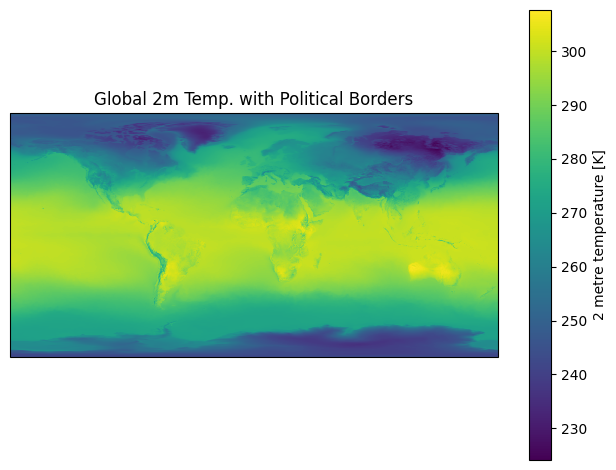

In [103]:
# Set up the minimal  map 
ax = plt.axes(projection=ccrs.PlateCarree())

# Plotting the 'tp' variable.
t2m.plot(ax=ax, transform=ccrs.PlateCarree(), x='longitude', y='latitude', add_colorbar=True)

# ax.add_feature(cfeature.BORDERS)  # Add political borders
# ax.add_feature(cfeature.COASTLINE)  # Add coastlines

plt.title('Global 2m Temp. with Political Borders')
plt.tight_layout()
plt.show()


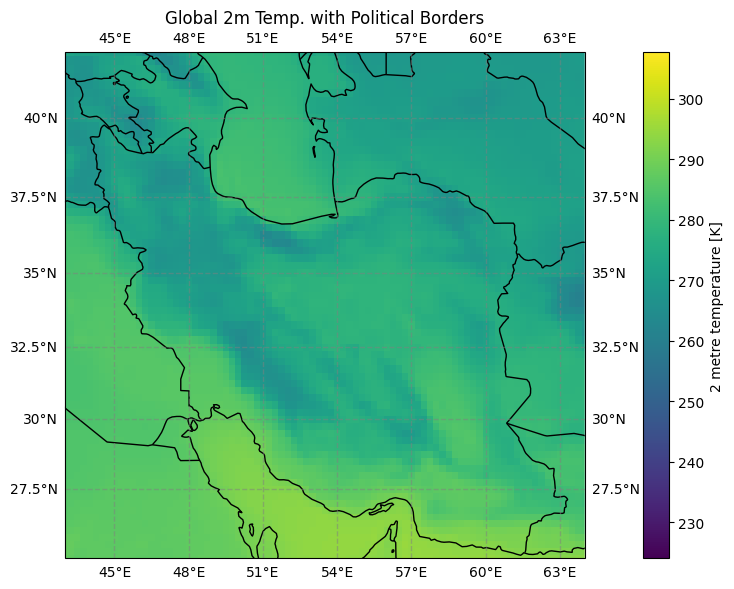

In [131]:
#extra modificcations

plt.figure(figsize=(12, 6))# define. plot size
ax = plt.axes(projection=ccrs.Mercator())

# Plotting the 'tp' variable.
t2m.plot(ax=ax, transform=ccrs.PlateCarree(), x='longitude', y='latitude', add_colorbar=True)

ax.add_feature(cfeature.BORDERS)  # Add political borders
ax.add_feature(cfeature.COASTLINE)  # Add coastlines

# # Draw grid lines
gridlines = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gridlines.xformatter = LONGITUDE_FORMATTER
gridlines.yformatter = LATITUDE_FORMATTER
ax.set_extent([43, 64, 25, 42], crs=ccrs.PlateCarree())


plt.title('Global 2m Temp. with Political Borders')
plt.grid(True)
plt.tight_layout()
plt.show()


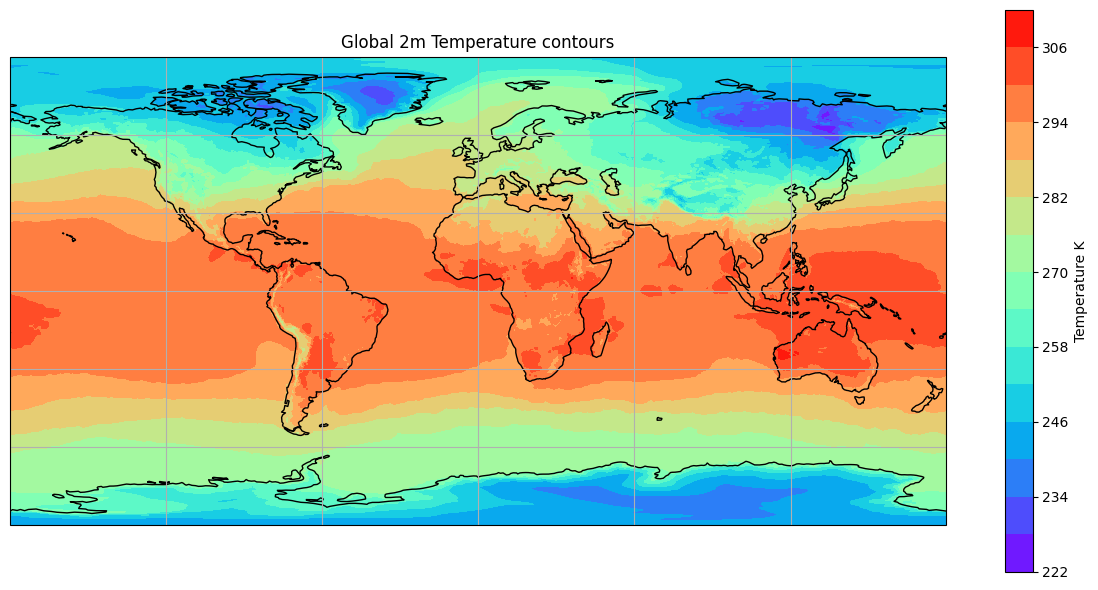

In [121]:
#filled color contours 

plt.figure(figsize=(12,6))
ax = plt.axes(projection=ccrs.PlateCarree())


x = data.variables['longitude']
y = data.variables['latitude']
X, Y = np.meshgrid(x, y)  # Original meshgrid

#defining the color contours
contour = ax.contourf(X, Y, t2m, transform=ccrs.PlateCarree(), cmap='rainbow', levels=15)
# Adding a colorbar
plt.colorbar(contour, ax=ax, label='Temperature K')

ax.add_feature(cfeature.COASTLINE)
ax.gridlines()

plt.title("Global 2m Temperature contours")
plt.tight_layout()
plt.show()

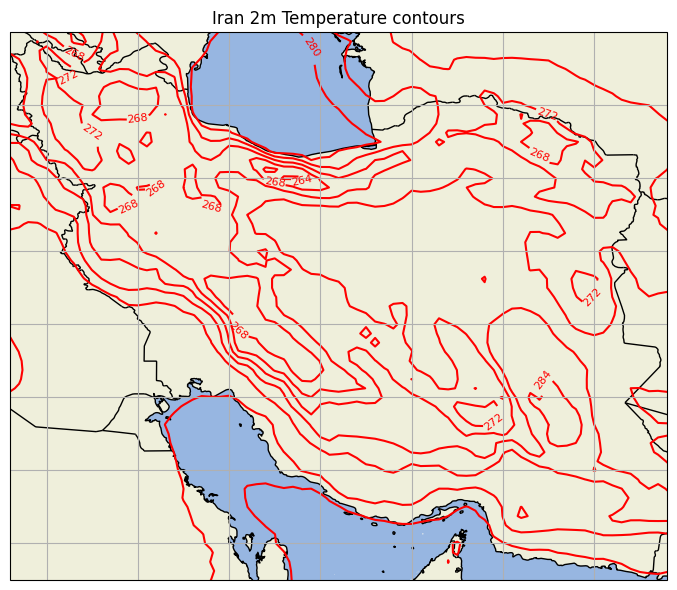

In [127]:
# line cntours

plt.figure(figsize=(12,6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.gridlines()

x = data.variables['longitude']
y = data.variables['latitude']
X, Y = np.meshgrid(x, y)  # Original meshgrid


# Set extent on a specific area
ax.set_extent([44, 62, 25, 40], crs=ccrs.PlateCarree())

# Defining the contour
contour = ax.contour(X, Y, t2m, transform=ccrs.PlateCarree(), colors='red', levels=25)
# add label
plt.clabel(contour, inline=True, fontsize=8) 


plt.title("Iran 2m Temperature contours")
plt.tight_layout()
plt.show()